<b>The Spark foundation GRIP: Data Science and Business Analytics (March'22)</b>


In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

# Load the iris dataset
iris = pd.read_csv("Iris.csv")

##iris_df = pd.DataFrame(iris, columns = iris.features_names)
##iris_df.head(10) # See the first 10 rows

In [2]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# Dropping ID column 
iris.drop("Id", axis=1, inplace= True)

In [7]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
iris.isnull().sum()       #checking for null values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
x= iris.drop(["Species"],axis=1)      #seperating numeric data from the dataset

In [11]:
y=iris["Species"]                     #categorical data

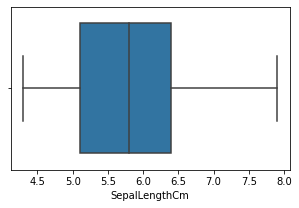

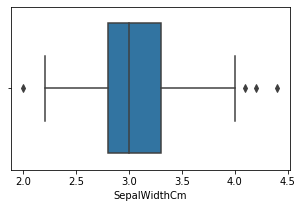

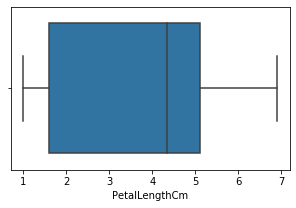

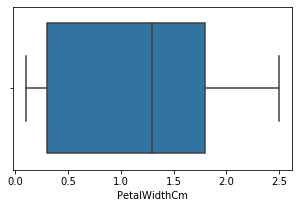

In [12]:
for i in x:                           #checking for any outliers in numerical data
    if x[i].dtype=='float64':
        plt.figure(figsize=(5,3))
        sns.boxplot(x[i])
        plt.show()

In [13]:
q1, q3= np.percentile(x['SepalWidthCm'],[25,75])    #outlier is found in SepalWidthCm and removing it using iqr method
iqr = q3-q1
lower_bound= q1 - (1.5*iqr)
upper_bound= q3 + (1.5*iqr)
x['SepalWidthCm']= x['SepalWidthCm'].apply(lambda x: upper_bound if x> upper_bound 
                                          else lower_bound if x < lower_bound else x)

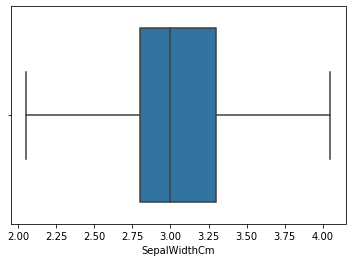

In [14]:
sns.boxplot(x['SepalWidthCm'])

In [15]:
print(y.value_counts())                            #calculating the total value counts in each category

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


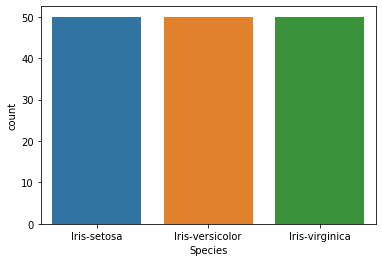

In [16]:
import seaborn as sns
sns.countplot(y)                                    #plotting to show the values obtained
plt.show()

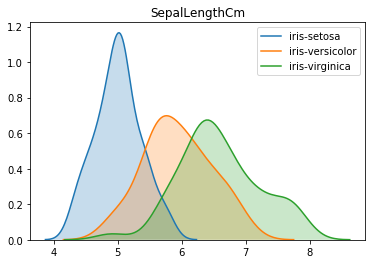

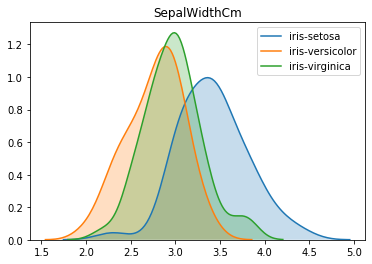

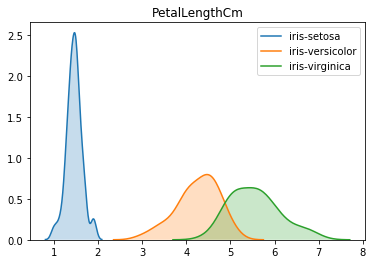

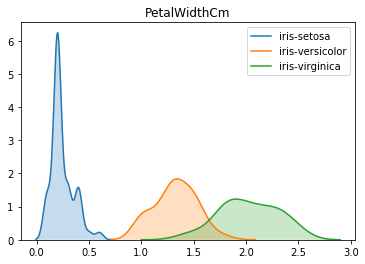

In [17]:
for i in iris.columns[:-1]:       # for each column as per category of species we are labelling the data
    sns.kdeplot(data= iris.loc[iris.Species=='Iris-setosa'][i], label= "iris-setosa", shade=True)
    sns.kdeplot(data= iris.loc[iris.Species=='Iris-versicolor'][i], label= "iris-versicolor", shade=True)
    sns.kdeplot(data= iris.loc[iris.Species=='Iris-virginica'][i], label= "iris-virginica", shade=True)
    
    
    plt.title(i)
    plt.show()

In [18]:
corr= iris.corr()                      #finding the correlation between each columns

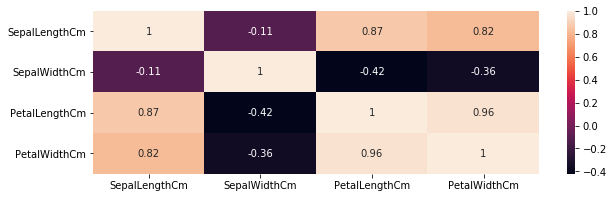

In [19]:
plt.figure(figsize=(10,3))
sns.heatmap(corr,                               #with the help of correlation, we can see which are highly related 
                                                # to which columns
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot= True)

#### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

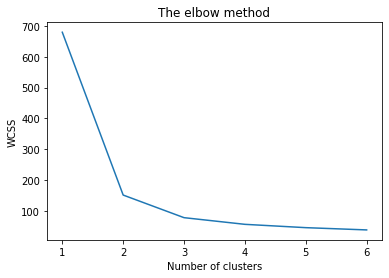

In [20]:
from sklearn.cluster import KMeans
#Finding the optimum number of clusters for k-means classification using elbow method

iris_d1 = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'

kmeans.cluster_centers_
plt.plot(range(1, 7), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [21]:
#here above we see that optimal value would be 3 as it is not decreasing steeply from that point.

In [22]:
kmeans.labels_                            #here labels formed are 6 means we had a range of 1 to 7 and from here we found 3 will be the number of clusters


array([5, 1, 1, 1, 5, 5, 1, 5, 1, 1, 5, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5,
       1, 5, 1, 1, 5, 5, 5, 1, 1, 5, 5, 5, 1, 1, 5, 1, 1, 5, 5, 1, 1, 5,
       5, 1, 5, 1, 5, 1, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2,
       2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 0, 2, 4, 0, 0, 4, 3, 4, 0, 4,
       0, 0, 0, 2, 0, 0, 0, 4, 4, 2, 0, 2, 4, 2, 0, 4, 2, 2, 0, 4, 4, 4,
       0, 2, 2, 4, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [23]:
# Applying kmeans to the dataset / Creating the kmeans classifier with value=3
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(iris_d1)

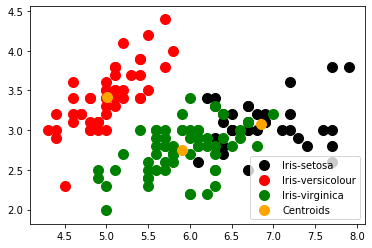

In [24]:
# Visualising the clusters - On the first two columns (Sepal length and sepal width)
plt.scatter(iris_d1[y_kmeans == 0, 0], iris_d1[y_kmeans == 0, 1], 
            s = 100, c = 'black', label = 'Iris-setosa')
plt.scatter(iris_d1[y_kmeans == 1, 0], iris_d1[y_kmeans == 1, 1], 
            s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(iris_d1[y_kmeans == 2, 0], iris_d1[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'orange', label = 'Centroids')

plt.legend()

In [25]:
iris['cluster']=kmeans.labels_

In [26]:
print(iris['cluster'].value_counts())        #here we can see that only 1 full cluster is accurately predicted 100%

2    62
1    50
0    38
Name: cluster, dtype: int64


In [27]:
iris.loc[iris['Species']=='Iris-setosa']['cluster'].value_counts()    #accurately predicted value


1    50
Name: cluster, dtype: int64

In [28]:
#forming a column species encoded to convert categorical value into numeric to form metrics

iris['Species_encoded']=iris['Species'].apply(lambda x: 1 if x=='Iris-setosa'else 2 if x=='Iris-versicolor' else 0)

In [29]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2,0
147,6.5,3.0,5.2,2.0,Iris-virginica,0,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0,0


In [30]:
# Parameters tested for classification report.
from sklearn.metrics import classification_report
print(classification_report(iris["Species_encoded"],iris["cluster"]))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82        50
           1       1.00      1.00      1.00        50
           2       0.77      0.96      0.86        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



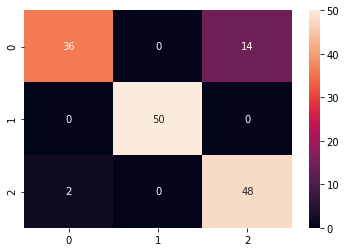

In [31]:
#forming confusion metric to better understand how the predicted values behaved.

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(iris["Species_encoded"],iris["cluster"]), annot=True);

### This concludes K-Means clustering problem.
